Found GPU at: /device:GPU:0
Done?
successssss
(600000, 2, 128) [2, 128]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_19 (Reshape)         (None, 2, 128, 1)         0         
_________________________________________________________________
zero_padding2d_19 (ZeroPaddi (None, 2, 132, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 2, 130, 64)        256       
_________________________________________________________________
dropout_28 (Dropout)         (None, 2, 130, 64)        0         
_________________________________________________________________
zero_padding2d_20 (ZeroPaddi (None, 2, 134, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 1, 132, 16)        6160      
_________________________________________________________________
drop

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Text(0.5, 1.0, 'CNN2 Classification Accuracy on RadioML 2016.10 Alpha')

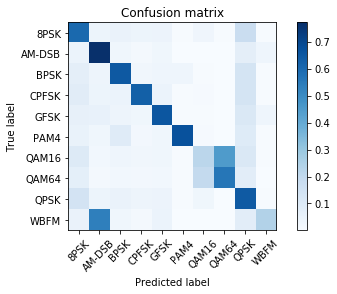

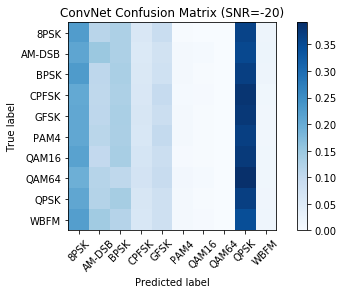

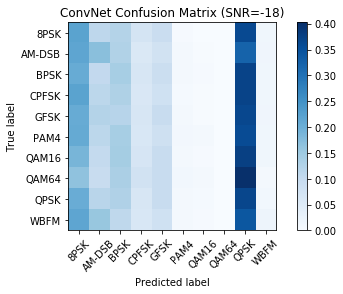

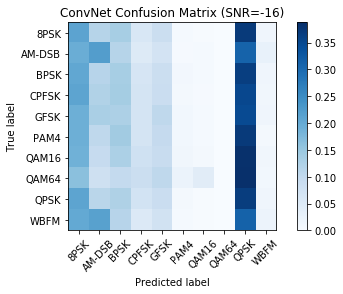

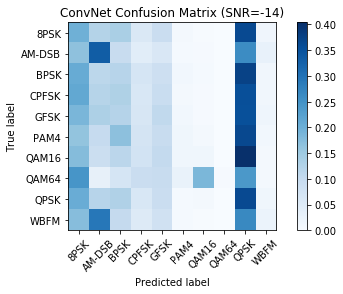

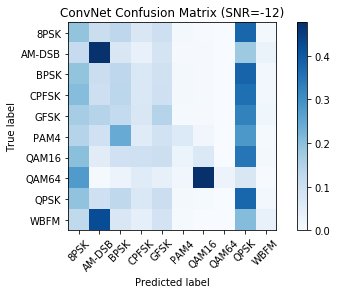

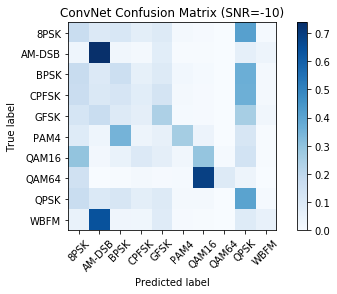

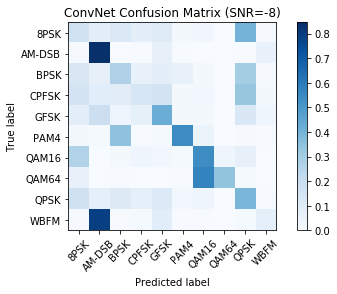

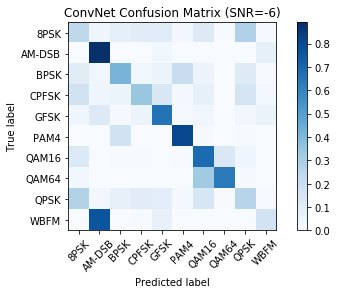

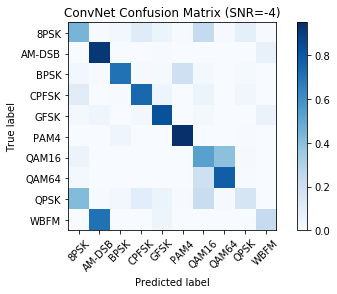

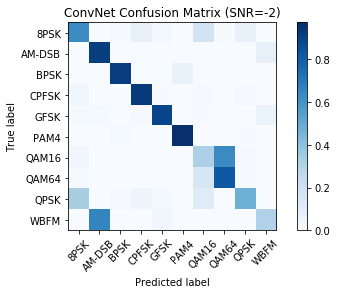

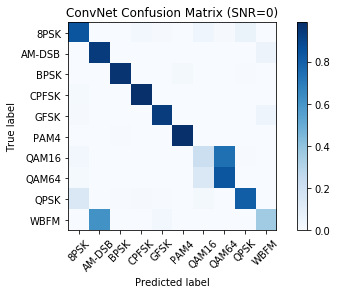

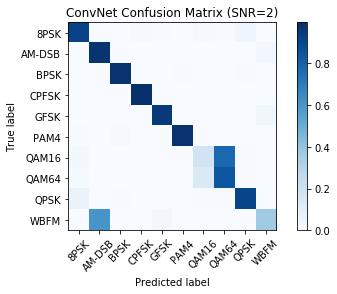

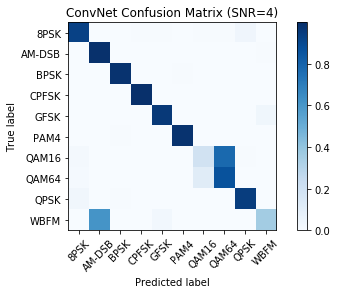

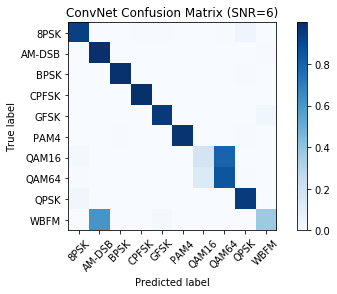

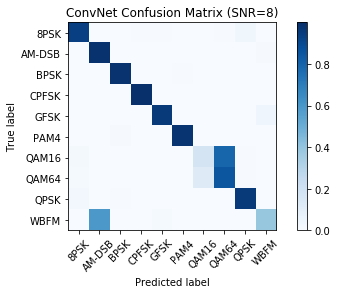

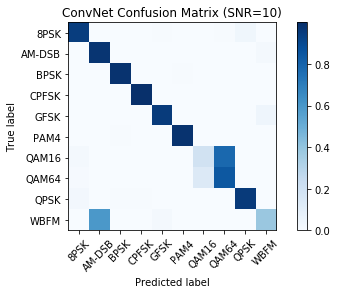

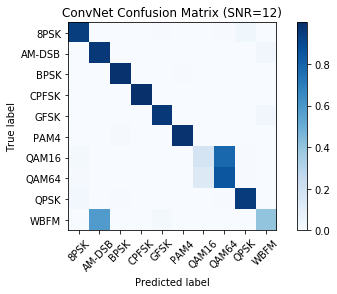

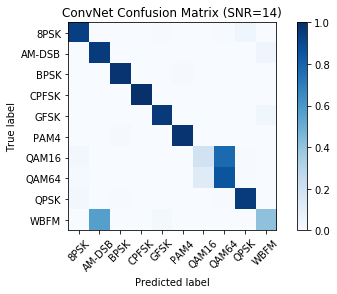

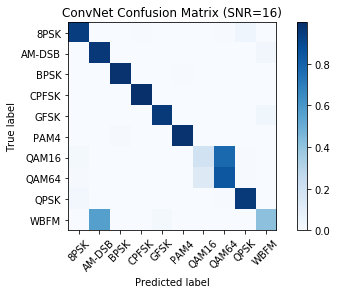

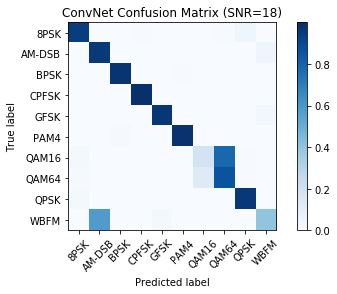

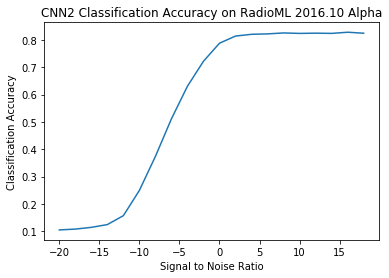

In [13]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
#!pip install pydrive
#!pip install pickle
from google.colab import files
import pickle
from pickle import _Unpickler
import gzip
import numpy
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#https://drive.google.com/open?id=1PMJaV3rwJzGA0SwGa5PkTV5mmbXJW5uy small data
#https://drive.google.com/open?id=1iG8UA_Loj5SJvuU_cFGZ_WfbBuCQZyXM big data 
#download = drive.CreateFile({'id': '1iG8UA_Loj5SJvuU_cFGZ_WfbBuCQZyXM'})
#download.GetContentFile('DOWNLOAD.pkl')

print('Done?')


# The classes Sequential and Dense are used to specify the nodes, connections, specifications of the neural network.
import keras
import keras.models as models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
import matplotlib.pyplot as plt


      


with open('DOWNLOAD.pkl', 'rb') as f:
    print('successssss')
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()
    
    
#print (p.keys())
import numpy as np
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], p.keys())))), [1,0])

X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(p[(mod,snr)])
        for i in range(p[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

#splitting the data....
np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.5
n_train=int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
dtrain = X[train_idx]
dtest =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
ltrainz = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx)))
ltestz = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))
in_shape = list(dtrain.shape[1:])
print (dtrain.shape, in_shape)
classes = mods



def split (data):
  text_train=[]
  text_test=[]
  i=0
  while i < len(data):
     if (i)%2==0 :
        text_train.append(data[i])

     else:
        text_test.append(data[i])
     i+=1
  return np.asarray(text_train),np.asarray(text_test)


def validation_split(data):
  text_train=[]
  text_validate=[]
  i=0
  while data.any() :
        text_validate.append(data[:25])
        text_train.append(data[25:500])
        data=data[500:]
  return np.asarray(text_validate),np.asarray(text_train)  
Xarrayed=np.array(X)
labels=np.array(lbl)


#derivation
X_driv=np.diff(dtrain)
z=np.zeros((600000,2,1))
X_driv=np.concatenate((X_driv,z), axis=2)

#integration
#print('integration part.....')
##X_npArray=np.array(X)
##integ=integrate.cumtrapz(X_npArray, initial=0)
#print(integ.shape)
#print(integ)

iteration=100
batch=600
dr = 0.1
model1 = keras.models.Sequential()
model1.add(Reshape(in_shape+[1], input_shape=in_shape))
model1.add(Dropout(dr))
model1.add(Flatten())
#model1.add(Dense(1024, activation='relu', kernel_initializer='he_normal', name="dense1"))
#model1.add(Dropout(dr))
#model1.add(Dense(1024, activation='relu', kernel_initializer='he_normal', name="dense2"))
#model1.add(Dropout(dr))
#model1.add(Dense(512, activation='relu', kernel_initializer='he_normal', name="dense3"))
#model1.add(Dropout(dr))
#model1.add(Dense(512, activation='relu', kernel_initializer='he_normal', name="dense4"))
#model1.add(Dropout(dr))
model1.add(Dense(256, activation='relu', kernel_initializer='he_normal', name="dense5"))
model1.add(Dropout(dr))
model1.add(Dense(256, activation='relu', kernel_initializer='he_normal', name="dense6"))
model1.add(Dropout(dr))
model1.add(Dense(180, activation='relu', kernel_initializer='he_normal', name="dense7"))
model1.add(Dropout(dr))
model1.add(Dense(180, activation='relu', kernel_initializer='he_normal', name="dense8"))
model1.add(Dropout(dr))
#model1.add(Dense(64, activation='relu', kernel_initializer='he_normal', name="dense9"))
#model1.add(Dropout(dr))
#model1.add(Dense(64, activation='relu', kernel_initializer='he_normal', name="dense10"))
#model1.add(Dropout(dr))
model1.add(Dense( len(classes), kernel_initializer='he_normal', name="dense11" ))
model1.add(Activation('softmax'))
model1.add(Reshape([len(classes)]))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

#-------------
filepath = 'savingweights.h5'
history=model1.fit(dtrain,ltrainz,batch_size=batch,epochs=iteration,verbose=2,validation_split=0.05,
callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
    ])

# we re-load the best weights once training is finished
model1.load_weights(filepath)
score = model1.evaluate(dtrain,ltrainz, batch_size=batch)
print(model1.metrics_names)
print('score :')
print(score)

scscore = model1.evaluate(X_test,Y_test, batch_size=batch)
print(model1.metrics_names)
print (scscore)

from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
#______________________________________________________________________________________________________________
dr = 0.1 # dropout rate (%)
model = keras.models.Sequential()
model.add(Reshape(in_shape+[1], input_shape=in_shape))
model.add(ZeroPadding2D((0, 2)))
model.add(Conv2D(64, (1, 3),padding='valid', activation="relu", name="conv1",kernel_initializer='glorot_uniform',data_format="channels_last"))
model.add(Dropout(dr))
model.add(ZeroPadding2D((0, 2)))
model.add(Conv2D(16,(2, 3), padding='valid', activation="relu", name="conv2", kernel_initializer='glorot_uniform',data_format="channels_last"))
model.add(Dropout(dr))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_normal', name="dense1"))
model.add(Dropout(dr))
model.add(Dense( len(classes), kernel_initializer='he_normal', name="dense2" ))
model.add(Activation('softmax'))
model.add(Reshape([len(classes)]))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

filepath = 'convmodrecnets_CNN2_0.5.wts.h5'
model.fit(dtrain,ltrainz,batch_size=batch,epochs=iteration,verbose=2,validation_split=0.05,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
    ])
# we re-load the best weights once training is finished
model.load_weights(filepath)

scscore = model.evaluate(dtest,ltestz, batch_size=batch)
print(model.metrics_names)
print (scscore)

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
test_Y_hat = model.predict(dtest, batch_size=batch)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])

for i in range(0,dtest.shape[0]):
    j = list(ltestz[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    
plot_confusion_matrix(confnorm, labels=classes)


acc = {}
#print(snrs)
for snr in snrs:

    # extract classes @ SNR
    test_SNRs = list(map(lambda x: lbl[x][1], test_idx)) #access the SNR part in the labels
    test_X_i = dtest[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = ltestz[np.where(np.array(test_SNRs)==snr)]    

    # estimate classes
    test_Y_i_hat = model.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)


print('first plots done')    
plt.figure()
plt.plot(snrs, list(map(lambda x: acc[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("CNN2 Classification Accuracy on RadioML 2016.10 Alpha")
